In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

## Pré-tratamento dos dados

#### Pandas

In [3]:
df = pd.read_csv('SN_d_tot_V2.0.csv', sep=';', header=None)
df.columns = ['year', 'month','day', 'FracDate', 'Sunspots', 'Std', 'Observations', 'Verified']
df = df[['year','month','day', 'Sunspots']]
df['Date'] = df.apply(lambda row: datetime(
                              int(row['year']), int(row['month']),int(row['day'])), axis=1)

df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)

daily_sun= df[['Date','Sunspots']]#df.head()
daily_sun = daily_sun.set_index(["Date"], drop=True)
daily_sun.head()

,Sunspots
Date,
1818-01-01,-1
1818-01-02,-1
1818-01-03,-1
1818-01-04,-1
1818-01-05,-1


#### Ordenar os dados

In [5]:
daily_sun = daily_sun.sort_index(axis=1, ascending=True)
daily_sun = daily_sun.iloc[::-1]
daily_sun.head(10)

,Sunspots
Date,
1818-01-01,-1
1818-01-02,-1
1818-01-03,-1
1818-01-04,-1
1818-01-05,-1
1818-01-06,-1
1818-01-07,-1
1818-01-08,65
1818-01-09,-1


#### Plot

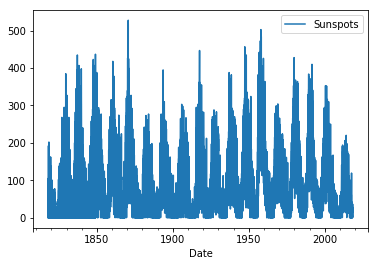

In [6]:
data = daily_sun[['Sunspots']]
data.plot(y='Sunspots')
plt.show()

In [7]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 1749 to %d"%(1818 + int(0.8*years)))

Total data: 200 years
80 percent data = 1749 to 1978


#### Dados de treino e validação

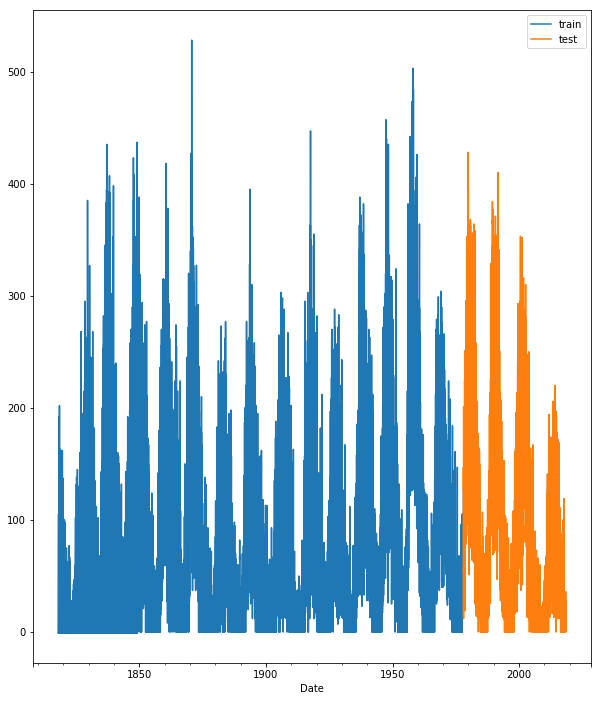

In [8]:
split_date = pd.Timestamp('01-01-1978')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

#### Normalização

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [10]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [11]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (58439 x 1)
Test size: (14760 x 1)


In [13]:
X_train[0:100]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.12476371],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.07183365],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.14744802],
       [0.18714556],
       [0.20037807],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04914934],
       [0.        ],
       [0.        ],
       [0.07372401],
       [0.03969754],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03402647],
       [0.        ],
       [0.03969754],
       [0.04914934],
       [0.        ],
       [0.        ],
       [0.16635161],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.36483932],
       [0.13988658],
       [0.15689981],
       [0.05482042],
       [0.   

In [14]:
y_test[0:100]

array([[0.25330813],
       [0.27977316],
       [0.2778828 ],
       [0.24574669],
       [0.21361059],
       [0.14933837],
       [0.10586011],
       [0.09829868],
       [0.04347826],
       [0.05671078],
       [0.07183365],
       [0.09073724],
       [0.10018904],
       [0.0926276 ],
       [0.07561437],
       [0.07183365],
       [0.0415879 ],
       [0.02457467],
       [0.02457467],
       [0.05482042],
       [0.07750473],
       [0.10964083],
       [0.10964083],
       [0.10396975],
       [0.13232514],
       [0.18147448],
       [0.20982987],
       [0.24196597],
       [0.2778828 ],
       [0.31758034],
       [0.34404537],
       [0.32325142],
       [0.34971645],
       [0.38185255],
       [0.36862004],
       [0.34782609],
       [0.3289225 ],
       [0.24196597],
       [0.26086957],
       [0.27410208],
       [0.30245747],
       [0.3100189 ],
       [0.25897921],
       [0.22117202],
       [0.1758034 ],
       [0.17391304],
       [0.15689981],
       [0.155

## Modelo SVM regressivo

In [43]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [44]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/home/janarf/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


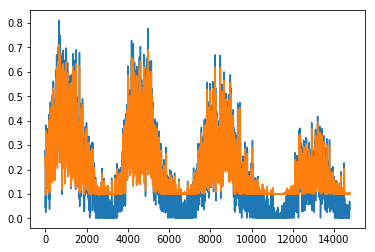

In [45]:
plt.plot(y_test)
plt.plot(y_pred)

In [47]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: 0.867444


## Usando Redes Neurais

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

### 1 hidden layer with 1 neuron

In [49]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=1)

Epoch 1/30
58439/58439 [==============================] - 3s 56us/step - loss: 0.0267
Epoch 2/30
58439/58439 [==============================] - 3s 46us/step - loss: 0.0048
Epoch 3/30
58439/58439 [==============================] - 3s 47us/step - loss: 0.0047
Epoch 4/30
58439/58439 [==============================] - 3s 47us/step - loss: 0.0047
Epoch 5/30
58439/58439 [==============================] - 3s 48us/step - loss: 0.0047
Epoch 6/30
58439/58439 [==============================] - 3s 47us/step - loss: 0.0047
Epoch 7/30
58439/58439 [==============================] - 3s 47us/step - loss: 0.0047
Epoch 8/30
58439/58439 [==============================] - 3s 51us/step - loss: 0.0047
Epoch 9/30
58439/58439 [==============================] - 3s 50us/step - loss: 0.0047
Epoch 10/30
58439/58439 [==============================] - 3s 55us/step - loss: 0.0047
Epoch 11/30
58439/58439 [==============================] - 3s 50us/step - loss: 0.0047
Epoch 12/30
58439/58439 [===========================

R-Squared: 0.944853


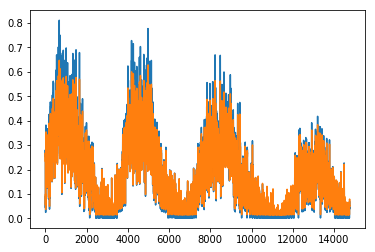

In [50]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

#### 2 Hidden Layers with 50 neurons each and ReLU activation function

In [51]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=1)

Epoch 1/5
58439/58439 [==============================] - 3s 55us/step - loss: 0.0048
Epoch 2/5
58439/58439 [==============================] - 3s 53us/step - loss: 0.0047
Epoch 3/5
58439/58439 [==============================] - 3s 53us/step - loss: 0.0047
Epoch 4/5
58439/58439 [==============================] - 3s 53us/step - loss: 0.0047
Epoch 5/5
58439/58439 [==============================] - 3s 58us/step - loss: 0.0047


R-Squared: 0.923865


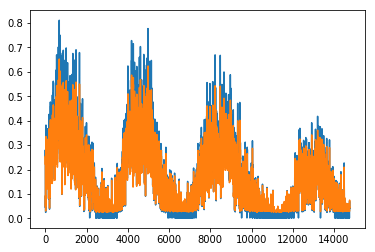

In [52]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))